In [71]:
import pandas as pd
import numpy as np
import os
import glob

In [72]:
# looking at files for team statistics
!ls ../data/raw/2016-2021_team_stats

2016-2021_defense_stats      2016-2021_specialteams_stats
2016-2021_offense_stats


In [73]:
off_path = "../data/raw/2016-2021_team_stats/2016-2021_offense_stats/"
def_path = "../data/raw/2016-2021_team_stats/2016-2021_defense_stats/"
spe_path ="../data/raw/2016-2021_team_stats/2016-2021_specialteams_stats"

In [74]:
off_csv_files = glob.glob(os.path.join(off_path, '*.csv'))
off_csv_files

['../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2021_team_offense-receiving.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2018_team_offense-passing.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2021_team_offense-downs.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2018_team_offense-receiving.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2018_team_offense-rushing.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2017_team_offense-downs.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2021_team_offense-scoring.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2016_team_offense-scoring.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2019_team_offense-downs.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2018_team_offense-downs.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_offense_stats/2020_team_offense-scoring.csv',
 '.

In [75]:
off_file_types = ['scoring', 'passing', 'rushing', 'receiving', 'downs']

In [76]:
master_df_off_score = pd.DataFrame()
master_df_off_pass = pd.DataFrame()
master_df_off_rush = pd.DataFrame()
master_df_off_rec = pd.DataFrame()
master_df_off_downs = pd.DataFrame()

for i in range(0,len(off_csv_files)):
    f = off_csv_files[i]
    # determining type of statistics from file name. 
    stat_type = off_csv_files[i].split('/')[-1].split('_')[-1].strip('.csv').split('-')[0]
    stat = off_csv_files[i].split('/')[-1].split('_')[-1].strip('.csv').split('-')[1]
    year = off_csv_files[i].split('/')[-1].split('_')[0]
    # read the csv file 
    df = pd.read_csv(f)

    # Add columns to be able to differentiate in larger dataset. 
    df.insert(0, column='year', value=year)
    df.insert(1, column='stat_type', value=stat_type)
    df.insert(2, column=stat, value=stat)

    # If condition to create 3 different types of dataframes
    if stat == 'scoring':
        master_df_off_score = pd.concat([master_df_off_score, df])
    elif stat == 'passing':
        master_df_off_pass = pd.concat([master_df_off_pass, df])
    elif stat == 'rushing':
        master_df_off_rush = pd.concat([master_df_off_rush, df])
    elif stat == 'receiving':
        master_df_off_rec = pd.concat([master_df_off_rec, df])
    elif stat == 'down':
        master_df_off_downs = pd.concat([master_df_off_downs, df])

In [77]:
print(master_df_off_score.shape, master_df_off_pass.shape, master_df_off_rush.shape, master_df_off_rec.shape, master_df_off_downs.shape)

(192, 8) (160, 19) (192, 14) (160, 14) (160, 13)


In [78]:
offensive_stats_aggregated = master_df_off_rush.merge(master_df_off_score, how='outer', on=['Team', 'stat_type', 'year']).merge(
    master_df_off_pass, how='outer', on=['Team', 'stat_type', 'year']).merge(
    master_df_off_rec, how='outer', on=['Team', 'stat_type', 'year']).merge(
    master_df_off_downs, how='outer', on=['Team', 'stat_type', 'year']).sort_values('year', ascending=True)

In [79]:
# Dropping 
offensive_stats_aggregated = offensive_stats_aggregated.dropna(axis=0)
offensive_stats_aggregated.head()

,year,stat_type,rushing,Team,Att_x,Rush Yds,YPC,TD_x,20+_x,40+_x,...,down,3rd Att,3rd Md,4th Att,4th Md,Rec 1st_y,Rec 1st%_y,Rush 1st_y,Rush 1st%_y,Scrm Plys
105,2017,offense,rushing,Chiefs,405,1903,4.7,12,15,4,...,down,199.0,78.0,10.0,3.0,198.0,54.5,95.0,23.5,985.0
109,2017,offense,rushing,Eagles,473,2115,4.5,9,19,3,...,down,230.0,96.0,26.0,17.0,193.0,56.6,108.0,22.8,1073.0
108,2017,offense,rushing,Dolphins,360,1388,3.9,4,10,4,...,down,202.0,64.0,24.0,7.0,187.0,50.1,66.0,18.3,995.0
107,2017,offense,rushing,Cowboys,480,2170,4.5,18,12,2,...,down,203.0,87.0,19.0,10.0,162.0,52.4,127.0,26.5,1005.0
106,2017,offense,rushing,Colts,451,1661,3.7,11,8,0,...,down,228.0,87.0,17.0,8.0,148.0,51.9,94.0,20.8,994.0


In [80]:
offensive_stats_aggregated['year_team'] = offensive_stats_aggregated['year'] + '_' + offensive_stats_aggregated['Team']

In [81]:
# check for missing data 
offensive_stats_aggregated.isna().sum()

year           0
stat_type      0
rushing        0
Team           0
Att_x          0
Rush Yds       0
YPC            0
TD_x           0
20+_x          0
40+_x          0
Lng_x          0
Rush 1st_x     0
Rush 1st%_x    0
Rush FUM       0
scoring        0
Rsh TD         0
Rec TD         0
Tot TD         0
2-PT           0
passing        0
Att_y          0
Cmp            0
Cmp %          0
Yds/Att        0
Pass Yds       0
TD_y           0
INT            0
Rate           0
1st            0
1st%           0
20+_y          0
40+_y          0
Lng_y          0
Sck            0
SckY           0
receiving      0
Rec            0
Yds            0
Yds/Rec        0
TD             0
20+            0
40+            0
Lng            0
Rec 1st_x      0
Rec 1st%_x     0
Rec FUM        0
down           0
3rd Att        0
3rd Md         0
4th Att        0
4th Md         0
Rec 1st_y      0
Rec 1st%_y     0
Rush 1st_y     0
Rush 1st%_y    0
Scrm Plys      0
year_team      0
dtype: int64

In [82]:
def_csv_files = glob.glob(os.path.join(def_path, '*.csv'))
def_csv_files

['../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2018_team_defense-fumbles.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2019_team_defense-passing.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2019_team_defense-rushing.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2020_team_defense-receiving.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2019_team_defense-receiving.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2018_team_defense-interceptions.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2018_team_defense-tackles.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2017_team_defense-scoring.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2020_team_defense-scoring.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2021_team_defense-scoring.csv',
 '../data/raw/2016-2021_team_stats/2016-2021_defense_stats/2019_team_defense-tac

In [83]:
# Creating aggregated files for 5 years for each defensive statistic, to be merged afterwards

master_df_def_fumble = pd.DataFrame()
master_df_def_passing = pd.DataFrame()
master_df_def_rushing = pd.DataFrame()
master_df_def_receiving = pd.DataFrame()
master_df_def_interception = pd.DataFrame()
master_df_def_tackle = pd.DataFrame()
master_df_def_scoring = pd.DataFrame()
master_df_def_down = pd.DataFrame()

for i in range(0,len(def_csv_files)):
    f = def_csv_files[i]
    # determining type of statistics from file name. 
    stat_type = def_csv_files[i].split('/')[-1].split('_')[-1].strip('.csv').split('-')[0]
    stat = def_csv_files[i].split('/')[-1].split('_')[-1].strip('.csv').split('-')[1]
    year = def_csv_files[i].split('/')[-1].split('_')[0]
    # read the csv file 
    df = pd.read_csv(f)

    # Add columns to be able to differentiate in larger dataset. 
    df.insert(0, column='year', value=year)
    df.insert(1, column='stat_type', value=stat_type)
    #df.insert(2, column='stat', value=stat)

    # If condition to create 3 different types of dataframes
    if stat == 'fumble':
        master_df_def_fumble = pd.concat([master_df_def_fumble, df])
    elif stat == 'passing':
        master_df_def_passing = pd.concat([master_df_def_passing, df])
    elif stat == 'rushing':
        master_df_def_rushing = pd.concat([master_df_def_rushing, df])
    elif stat == 'receiving':
        master_df_def_receiving = pd.concat([master_df_def_receiving, df])
    elif stat == 'interception':
        master_df_def_interception = pd.concat([master_df_def_interception, df])
    elif stat == 'tackle':
        master_df_def_tackle = pd.concat([master_df_def_tackle, df])
    elif stat == 'scoring':
        master_df_def_scoring = pd.concat([master_df_def_scoring, df])
    elif stat == 'down':
        master_df_def_down = pd.concat([master_df_def_down, df])



In [84]:
print(master_df_def_fumble.shape, master_df_def_passing.shape, master_df_def_rushing.shape, master_df_def_receiving.shape, master_df_def_interception.shape,
      master_df_def_tackle.shape, master_df_def_scoring.shape, master_df_def_down.shape)
master_df_def_fumble

(160, 8) (160, 17) (160, 13) (160, 14) (160, 7) (160, 7) (160, 6) (160, 12)


,year,stat_type,Team,FF,FR,FR TD,Rec FUM,Rush FUM
0,2018,defense,49ers,11,5,0,4,6
1,2018,defense,Bears,18,9,1,4,5
2,2018,defense,Bengals,10,6,2,3,3
3,2018,defense,Bills,21,11,0,4,10
4,2018,defense,Broncos,13,10,0,3,6
...,...,...,...,...,...,...,...,...
27,2021,defense,Seahawks,9,7,0,1,5
28,2021,defense,Steelers,18,9,0,7,7
29,2021,defense,Texans,16,8,0,4,10
30,2021,defense,Titans,13,6,1,7,4


In [85]:
defensive_stats_aggregated = master_df_def_fumble.merge(master_df_def_passing, how='outer', on=['year', 'Team', 'stat_type'], suffixes=('_fum', '_pass')).merge(
    master_df_def_rushing, how='outer', on=['year', 'Team', 'stat_type']).merge(master_df_def_receiving, how='outer', 
                                                                                on=['year', 'Team', 'stat_type']).merge(
    master_df_def_interception, how='outer', on=['year', 'Team', 'stat_type'], suffixes=('_rec', '_int')).merge(
    master_df_def_tackle, how='outer', on=['year', 'Team', 'stat_type']).merge(master_df_def_scoring, how='outer', on=[
    'year', 'Team', 'stat_type']).merge(master_df_def_down, how='outer', on=['year', 'Team', 'stat_type'])

In [86]:
defensive_stats_aggregated.head()

,year,stat_type,Team,FF,FR,FR TD_x,Rec FUM_x,Rush FUM_x,Att_x,Cmp,...,INT TD_y,3rd Att,3rd Md,4th Att,4th Md,Rec 1st_y,Rec 1st%_y,Rush 1st_y,Rush 1st%_y,Scrm Plys
0,2018,defense,49ers,11,5,0,4,6,542,344,...,1,216,87,17,10,195,56.7,104,23.4,1023
1,2018,defense,Bears,18,9,1,4,5,615,377,...,5,219,75,28,16,186,49.3,67,19.8,1004
2,2018,defense,Bengals,10,6,2,3,3,584,389,...,3,223,109,17,11,221,56.8,125,26.8,1084
3,2018,defense,Bills,21,11,0,4,10,492,313,...,0,203,74,11,6,157,50.2,111,25.2,968
4,2018,defense,Broncos,13,10,0,3,6,549,353,...,2,211,82,11,6,197,55.8,85,19.8,1022


In [87]:
defensive_stats_aggregated['year_team'] = defensive_stats_aggregated['year']+ '_' + defensive_stats_aggregated['Team']

In [88]:
defensive_stats_aggregated.isna().sum()

year           0
stat_type      0
Team           0
FF             0
FR             0
              ..
Rec 1st%_y     0
Rush 1st_y     0
Rush 1st%_y    0
Scrm Plys      0
year_team      0
Length: 64, dtype: int64

In [89]:
#spe_csv_files = glob.glob(os.path.join(spe_path, '*.csv'))
#spe_csv_files

In [91]:
super_bowl_winners = pd.read_csv('../data/raw/pfr_super_bowl_stats_all_raw.csv')
super_bowl_winners

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State
0,Feb 12 2023,LVII (57),Kansas City Chiefs,38.0,Philadelphia Eagles,35.0,Patrick Mahomes,State Farm Stadium,Glendale,Arizona
1,Feb 13 2022,LVI (56),Los Angeles Rams,23.0,Cincinnati Bengals,20.0,Cooper Kupp,SoFi Stadium,Inglewood,California
2,Feb 7 2021,LV (55),Tampa Bay Buccaneers,31.0,Kansas City Chiefs,9.0,Tom Brady,Raymond James Stadium,Tampa,Florida
3,Feb 2 2020,LIV (54),Kansas City Chiefs,31.0,San Francisco 49ers,20.0,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
4,Feb 3 2019,LIII (53),New England Patriots,13.0,Los Angeles Rams,3.0,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
5,Feb 4 2018,LII (52),Philadelphia Eagles,41.0,New England Patriots,33.0,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
6,Feb 5 2017,LI (51),New England Patriots,34.0,Atlanta Falcons,28.0,Tom Brady,NRG Stadium,Houston,Texas
7,Feb 7 2016,50,Denver Broncos,24.0,Carolina Panthers,10.0,Von Miller,Levi's Stadium,Santa Clara,California
8,Feb 1 2015,XLIX (49),New England Patriots,28.0,Seattle Seahawks,24.0,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
9,Feb 2 2014,XLVIII (48),Seattle Seahawks,43.0,Denver Broncos,8.0,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey


In [92]:
# Creating new columns to act as matching keys between super bowl winner, loser and aggregated team stats datasets to indicate SB appearance
super_bowl_winners['winner_team_name'] = super_bowl_winners['Date'].str[-4:] + '_' + super_bowl_winners['Winner'].str.split(' ').str[-1]
super_bowl_winners['second_team_name'] = super_bowl_winners['Date'].str[-4:] + '_' + super_bowl_winners['Loser'].str.split(' ').str[-1]
super_bowl_winners

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State,winner_team_name,second_team_name
0,Feb 12 2023,LVII (57),Kansas City Chiefs,38.0,Philadelphia Eagles,35.0,Patrick Mahomes,State Farm Stadium,Glendale,Arizona,2023_Chiefs,2023_Eagles
1,Feb 13 2022,LVI (56),Los Angeles Rams,23.0,Cincinnati Bengals,20.0,Cooper Kupp,SoFi Stadium,Inglewood,California,2022_Rams,2022_Bengals
2,Feb 7 2021,LV (55),Tampa Bay Buccaneers,31.0,Kansas City Chiefs,9.0,Tom Brady,Raymond James Stadium,Tampa,Florida,2021_Buccaneers,2021_Chiefs
3,Feb 2 2020,LIV (54),Kansas City Chiefs,31.0,San Francisco 49ers,20.0,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,2020_Chiefs,2020_49ers
4,Feb 3 2019,LIII (53),New England Patriots,13.0,Los Angeles Rams,3.0,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,2019_Patriots,2019_Rams
5,Feb 4 2018,LII (52),Philadelphia Eagles,41.0,New England Patriots,33.0,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,2018_Eagles,2018_Patriots
6,Feb 5 2017,LI (51),New England Patriots,34.0,Atlanta Falcons,28.0,Tom Brady,NRG Stadium,Houston,Texas,2017_Patriots,2017_Falcons
7,Feb 7 2016,50,Denver Broncos,24.0,Carolina Panthers,10.0,Von Miller,Levi's Stadium,Santa Clara,California,2016_Broncos,2016_Panthers
8,Feb 1 2015,XLIX (49),New England Patriots,28.0,Seattle Seahawks,24.0,Tom Brady,University of Phoenix Stadium,Glendale,Arizona,2015_Patriots,2015_Seahawks
9,Feb 2 2014,XLVIII (48),Seattle Seahawks,43.0,Denver Broncos,8.0,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey,2014_Seahawks,2014_Broncos


In [93]:
# Adding super bowl winner or 2nd place columns to offensive and defensive aggregated dfs. 

# offensive
offensive_stats_aggregated['sb_winner'] = np.where(offensive_stats_aggregated['year_team'].isin(
    super_bowl_winners['winner_team_name']), 1, 0)
offensive_stats_aggregated['sb_appearance'] = np.where(offensive_stats_aggregated['year_team'].isin(np.concatenate((
super_bowl_winners['winner_team_name'].values, super_bowl_winners['second_team_name'].values))), 1, 0)

# defensive
defensive_stats_aggregated['sb_winner'] = np.where(defensive_stats_aggregated['year_team'].isin(
    super_bowl_winners['winner_team_name']), 1, 0)
defensive_stats_aggregated['sb_appearance'] = np.where(defensive_stats_aggregated['year_team'].isin(np.concatenate((
super_bowl_winners['winner_team_name'].values, super_bowl_winners['second_team_name'].values))), 1, 0)



In [94]:
defensive_stats_aggregated.columns

Index(['year', 'stat_type', 'Team', 'FF', 'FR', 'FR TD_x', 'Rec FUM_x',
       'Rush FUM_x', 'Att_x', 'Cmp', 'Cmp %', 'Yds/Att', 'Yds_x', 'TD_x',
       'INT_rec', 'Rate', '1st', '1st%', '20+_x', '40+_x', 'Lng_x', 'Sck_x',
       'Att_y', 'Rush Yds', 'YPC', 'TD_y', '20+_y', '40+_y', 'Lng_y',
       'Rush 1st_x', 'Rush 1st%_x', 'Rush FUM_y', 'Rec', 'Yds_y', 'Yds/Rec',
       'TD', '20+', '40+', 'Lng_rec', 'Rec 1st_x', 'Rec 1st%_x', 'Rec FUM_y',
       'PDef', 'INT_int', 'INT TD_x', 'INT Yds', 'Lng_int', 'Sck_y', 'Comb',
       'Asst', 'Solo', 'FR TD_y', 'SFTY', 'INT TD_y', '3rd Att', '3rd Md',
       '4th Att', '4th Md', 'Rec 1st_y', 'Rec 1st%_y', 'Rush 1st_y',
       'Rush 1st%_y', 'Scrm Plys', 'year_team', 'sb_winner', 'sb_appearance'],
      dtype='object')

In [95]:
# Updating naming of defensive columns, and highlighting duplicates to be dropped. 

updated_columns = ['year', 'stat_type', 'team', 'forced_fumbles', 'fumble_recoveries', 'fumble_recovery_td', 'reception_fumble',
       'rush_fumble', 'pass_attempt', 'pass_cmp', 'pass_cmp%', 'avg_pass_yds', 'total_pass_yds', 'pass_td',
       'pass_int', 'opp_qb_rate', 'pass_1st', 'pass_1st%', 'pass_20+', 'pass_40+', 'pass_Lng', 'pass_Sck',
       'rush_att', 'rush_yds', 'avg_rush_yds', 'rush_td', 'rush_20+', 'rush_40+', 'rush_Lng',
       'rush_1st', 'rush_1st%', 'rush_fumbles', 'recs', 'rec_yds', 'avg_rec_yds',
       'DUPLICATErecTD', 'DUPLICATE20+', 'DUPLICATE40+', 'DUPLICATELng_rec', 'DUPLICATERec 1st_x', 'DUPLICATERec 1st%_x', 'DUPLICATERec FUM_y',
       'PDef', 'DUPLICATEINT_int', 'int_td', 'int_yds', 'int_lng', 'total_sack', 'tackle_combined',
       'tackle_asst', 'tackle_solo', 'DUPLICATEFR TD_y', 'SFTY', 'DUPLICATEINT TD_y', '3rd_att', '3rd_md',
       '4th_att', '4th_md', 'rec_1st_all', 'rec_1st%_all', 'rush_1st_all',
       'rush_1st%_all', 'total_plays', 'year_team', 'sb_winner', 'sb_appearance']

In [96]:
defensive_stats_aggregated.columns = updated_columns
defensive_stats_aggregated = defensive_stats_aggregated.drop(columns=['DUPLICATErecTD', 'DUPLICATE20+', 'DUPLICATE40+', 'DUPLICATELng_rec', 'DUPLICATERec 1st_x', 
                                         'DUPLICATERec 1st%_x', 'DUPLICATERec FUM_y','DUPLICATEINT_int', 'DUPLICATEFR TD_y', 'DUPLICATEINT TD_y'])

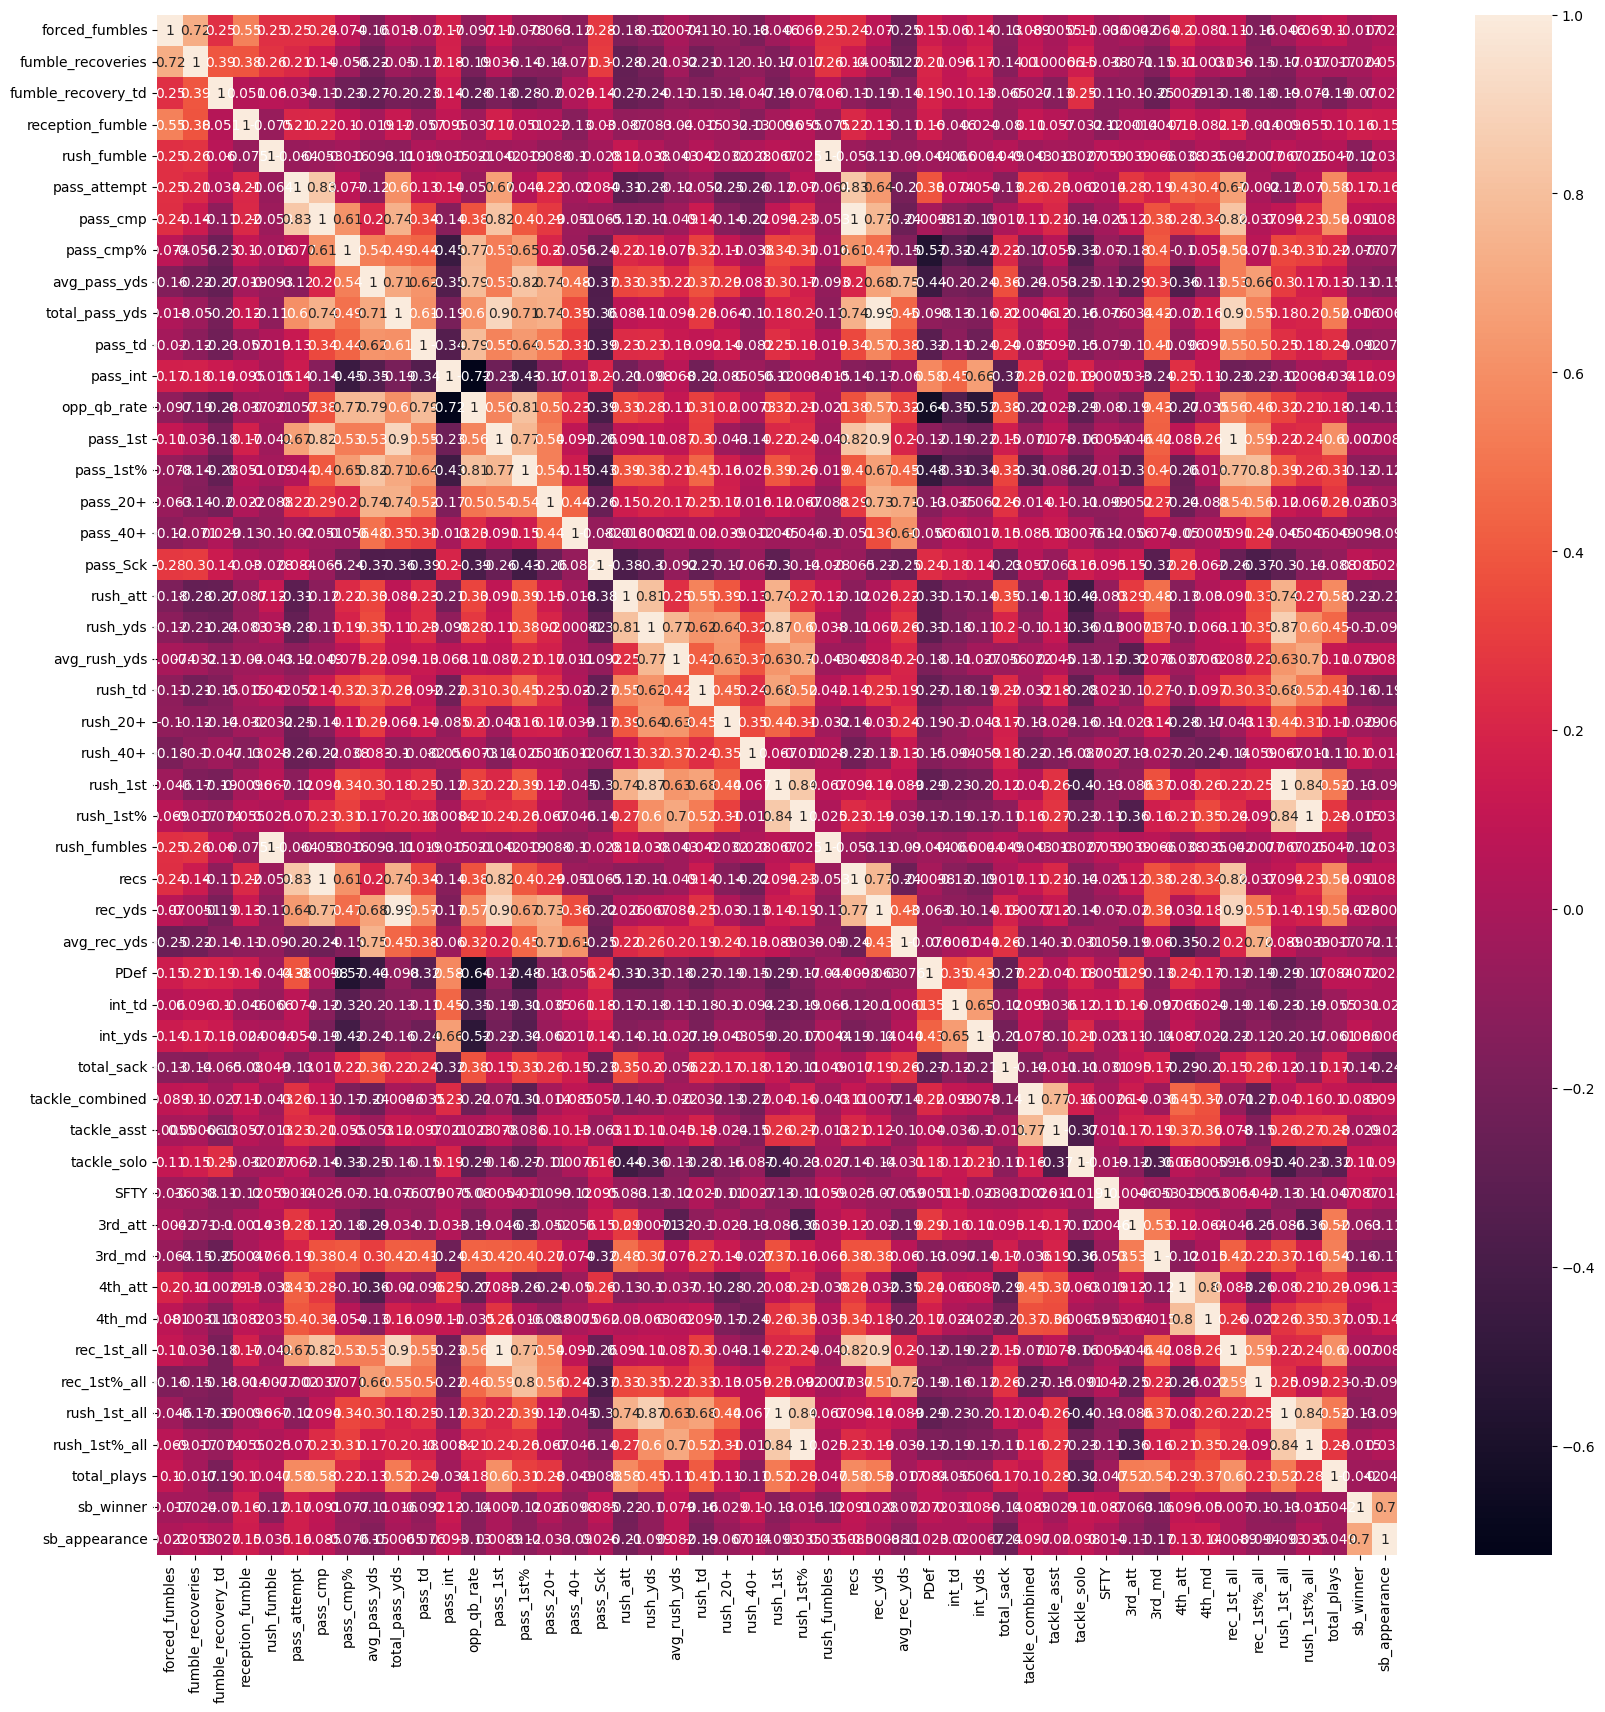

,forced_fumbles,fumble_recoveries,fumble_recovery_td,reception_fumble,rush_fumble,pass_attempt,pass_cmp,pass_cmp%,avg_pass_yds,total_pass_yds,...,3rd_md,4th_att,4th_md,rec_1st_all,rec_1st%_all,rush_1st_all,rush_1st%_all,total_plays,sb_winner,sb_appearance
forced_fumbles,1.000000,0.721771,0.247060,0.545506,0.250679,0.251287,0.241587,0.073897,-0.155056,0.018391,...,-0.064400,0.197816,0.080871,0.110223,-0.164111,-0.045815,0.069226,0.104700,-0.016614,0.022238
fumble_recoveries,0.721771,1.000000,0.388161,0.381653,0.262612,0.214703,0.139725,-0.055686,-0.220398,-0.049931,...,-0.152108,0.108740,-0.003108,0.035726,-0.147791,-0.166579,-0.017255,-0.016961,-0.024441,0.052705
fumble_recovery_td,0.247060,0.388161,1.000000,0.051199,0.059585,0.033542,-0.106658,-0.234443,-0.273107,-0.200213,...,-0.254787,-0.002918,-0.131009,-0.184895,-0.184596,-0.193126,-0.074421,-0.187801,-0.070240,0.027247
reception_fumble,0.545506,0.381653,0.051199,1.000000,-0.074501,0.207549,0.218972,0.102397,-0.018598,0.121827,...,-0.004654,0.132421,0.081954,0.166475,-0.013934,-0.009612,0.054907,0.101626,0.159531,0.145944
rush_fumble,0.250679,0.262612,0.059585,-0.074501,1.000000,-0.064396,-0.053410,-0.016167,-0.092571,-0.108079,...,0.066308,-0.037514,0.035410,-0.041726,-0.007736,0.067211,0.024559,0.047194,-0.123637,0.035282
pass_attempt,0.251287,0.214703,0.033542,0.207549,-0.064396,1.000000,0.833319,0.076946,-0.118261,0.597313,...,0.193542,0.427688,0.395408,0.668280,-0.002031,-0.118856,0.070291,0.577013,0.165628,0.159408
pass_cmp,0.241587,0.139725,-0.106658,0.218972,-0.053410,0.833319,1.000000,0.614046,0.201811,0.740606,...,0.375488,0.283153,0.340975,0.824233,0.036738,0.093679,0.227383,0.581946,0.091451,0.084918
pass_cmp%,0.073897,-0.055686,-0.234443,0.102397,-0.016167,0.076946,0.614046,1.000000,0.536844,0.486436,...,0.396281,-0.103987,0.054376,0.533335,0.070637,0.336341,0.309111,0.222722,-0.077030,-0.076012
avg_pass_yds,-0.155056,-0.220398,-0.273107,-0.018598,-0.092571,-0.118261,0.201811,0.536844,1.000000,0.709090,...,0.303704,-0.357894,-0.128245,0.530905,0.662046,0.298794,0.172597,0.132017,-0.113803,-0.149630
total_pass_yds,0.018391,-0.049931,-0.200213,0.121827,-0.108079,0.597313,0.740606,0.486436,0.709090,1.000000,...,0.419811,-0.020368,0.159596,0.901195,0.546798,0.184173,0.196533,0.516473,0.015718,-0.006495


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
defensive_stats_aggregated_num = defensive_stats_aggregated.select_dtypes(np.number)
defensive_stats_aggregated_num_corr = defensive_stats_aggregated_num.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(defensive_stats_aggregated_num_corr, annot=True)
plt.show()
defensive_stats_aggregated_num_corr

In [98]:
defensive_stats_aggregated.columns

Index(['year', 'stat_type', 'team', 'forced_fumbles', 'fumble_recoveries',
       'fumble_recovery_td', 'reception_fumble', 'rush_fumble', 'pass_attempt',
       'pass_cmp', 'pass_cmp%', 'avg_pass_yds', 'total_pass_yds', 'pass_td',
       'pass_int', 'opp_qb_rate', 'pass_1st', 'pass_1st%', 'pass_20+',
       'pass_40+', 'pass_Lng', 'pass_Sck', 'rush_att', 'rush_yds',
       'avg_rush_yds', 'rush_td', 'rush_20+', 'rush_40+', 'rush_Lng',
       'rush_1st', 'rush_1st%', 'rush_fumbles', 'recs', 'rec_yds',
       'avg_rec_yds', 'PDef', 'int_td', 'int_yds', 'int_lng', 'total_sack',
       'tackle_combined', 'tackle_asst', 'tackle_solo', 'SFTY', '3rd_att',
       '3rd_md', '4th_att', '4th_md', 'rec_1st_all', 'rec_1st%_all',
       'rush_1st_all', 'rush_1st%_all', 'total_plays', 'year_team',
       'sb_winner', 'sb_appearance'],
      dtype='object')

In [99]:
updated_columns = ['year', 'stat_type', 'rushing', 'Team', 'rush_att', 'rush_yds', 'avg_rush',
       'rush_td', 'rush_20+', 'rush_40+', 'rush_Lng', 'rush_1st', 'rush_1st%',
       'rush_fumbles', 'scoring', 'DUPLICATERsh TD', 'rec_td', 'tot_td', '2pt', 'passing',
       'pass_att', 'pass_cmp', 'pass_cmp%', 'avg_pass', 'pass_yds', 'DUPLICATETD_y', 'int', 'qbrate',
       'DUPLCIATEDpass_1st', 'DUPLICATEDpass_1st%', 'DUPLICATEpass_20+', 'DUPLICATEpass_40+', 'pass_lng', 'sck', 'SckY', 'receiving',
       'DUPLICATERec', 'DUPLICATEpass_yds', 'DUPLICATEavg_pass_yds', 'DUPLICATETD', 'pass_20+', 'pass_40+', 'pass_Lng', 'pass_rec_1st',
       'pass_rec_1st%', 'rec_fumbles', 'down', '3rd_att', '3rd_md', '4th_att',
       '4th_md', 'DUPLICATEDRec 1st_y', 'DUPLICATERec 1st%_y', 'DUPLICATERush 1st_y', 'DUPLICATERush 1st%_y',
       'total_plays', 'year_team', 'sb_winner', 'sb_appearance']


In [100]:
offensive_stats_aggregated.columns = updated_columns

offensive_stats_aggregated_1 = offensive_stats_aggregated.drop(columns=['DUPLICATERsh TD', 'rushing', 'scoring', 'DUPLICATETD_y', 'receiving', 'DUPLICATERec', 'DUPLICATETD',
                                        'DUPLICATEDRec 1st_y', 'DUPLICATERec 1st%_y', 'DUPLICATERush 1st_y', 'down', 'DUPLICATERush 1st%_y',
                                                                     'DUPLICATEpass_yds', 'DUPLICATEavg_pass_yds', 'DUPLICATEpass_20+', 'DUPLICATEpass_40+',
                                                                     'DUPLCIATEDpass_1st', 'DUPLICATEDpass_1st%'])

In [101]:
# Calculating the skewness towards a particular touchdown method for a team's offence in a season, based on the difference between 
# receiving touchdowns and rushing touchdowns, divided by the total number of touchdowns for the team. 
# diff between x and y, divided by x + y + a. If x and y are similar, then expect a low percentage. 
# if x and y are not similar, expect a high percentage. Also accounts for touchdowns scored by team in other methods outside of rush and rec
offensive_stats_aggregated_1['td_spread_ratio'] = round(abs(offensive_stats_aggregated_1['rec_td'] - offensive_stats_aggregated_1['rush_td'])/offensive_stats_aggregated_1['tot_td'] * 100, 2)

In [102]:
offensive_stats_aggregated_1_num = offensive_stats_aggregated_1.select_dtypes(np.number)
offensive_stats_aggregated_num_corr = offensive_stats_aggregated_1_num.corr()
offensive_stats_aggregated_num_corr[['td_spread_ratio', 'sb_winner', 'sb_appearance']]

,td_spread_ratio,sb_winner,sb_appearance
rush_att,-0.453224,-0.047404,-0.018374
rush_yds,-0.468779,-0.066664,-0.050022
avg_rush,-0.316655,-0.065460,-0.069722
rush_td,-0.704068,0.029413,0.089483
rush_20+,-0.260366,-0.094404,-0.100117
rush_40+,-0.253123,-0.154854,-0.188694
rush_1st,-0.500021,0.021221,0.049895
rush_1st%,-0.406270,0.086642,0.106010
rush_fumbles,-0.173049,-0.127245,-0.085660
rec_td,0.541609,0.193379,0.159341


In [103]:
# submitting aggregated csvs to cleaned data file. 
offensive_stats_aggregated_1.to_csv('../data/cleaned/2017-2021_aggregated_team_offensive_stats_with_sb.csv', index=False)
defensive_stats_aggregated.to_csv('../data/cleaned/2017-2021_aggregated_team_defensive_stats_with_sb.csv', index=False)

In [104]:
offensive_stats_aggregated_1.select_dtypes(np.number)

,rush_att,rush_yds,avg_rush,rush_td,rush_20+,rush_40+,rush_1st,rush_1st%,rush_fumbles,rec_td,...,pass_rec_1st%,rec_fumbles,3rd_att,3rd_md,4th_att,4th_md,total_plays,sb_winner,sb_appearance,td_spread_ratio
105,405,1903,4.7,12,15,4,95,23.5,3,26,...,54.5,2.0,199.0,78.0,10.0,3.0,985.0,0,0,33.33
109,473,2115,4.5,9,19,3,108,22.8,11,38,...,56.6,2.0,230.0,96.0,26.0,17.0,1073.0,0,0,54.72
108,360,1388,3.9,4,10,4,66,18.3,5,24,...,50.1,10.0,202.0,64.0,24.0,7.0,995.0,0,0,64.52
107,480,2170,4.5,18,12,2,127,26.5,1,22,...,52.4,2.0,203.0,87.0,19.0,10.0,1005.0,0,0,9.52
106,451,1661,3.7,11,8,0,94,20.8,7,13,...,51.9,4.0,228.0,87.0,17.0,8.0,994.0,0,0,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,411,1583,3.9,10,9,0,85,20.7,0,23,...,48.0,4.0,239.0,93.0,21.0,10.0,1113.0,0,0,38.24
157,420,1422,3.4,8,6,0,77,18.3,5,21,...,45.8,5.0,239.0,95.0,21.0,9.0,1010.0,0,0,41.94
158,551,2404,4.4,23,11,3,134,24.3,9,22,...,54.0,4.0,236.0,103.0,24.0,15.0,1133.0,0,0,2.04
145,392,1755,4.5,13,7,2,92,23.5,6,12,...,49.3,5.0,212.0,76.0,31.0,18.0,1028.0,0,0,3.57


In [105]:
defensive_stats_aggregated.select_dtypes(np.number)

,forced_fumbles,fumble_recoveries,fumble_recovery_td,reception_fumble,rush_fumble,pass_attempt,pass_cmp,pass_cmp%,avg_pass_yds,total_pass_yds,...,3rd_md,4th_att,4th_md,rec_1st_all,rec_1st%_all,rush_1st_all,rush_1st%_all,total_plays,sb_winner,sb_appearance
0,11,5,0,4,6,542,344,63.5,7.3,3732,...,87,17,10,195,56.7,104,23.4,1023,0,0
1,18,9,1,4,5,615,377,61.3,6.3,3515,...,75,28,16,186,49.3,67,19.8,1004,0,0
2,10,6,2,3,3,584,389,66.6,7.9,4414,...,109,17,11,221,56.8,125,26.8,1084,0,0
3,21,11,0,4,10,492,313,63.6,6.3,2867,...,74,11,6,157,50.2,111,25.2,968,0,0
4,13,10,0,3,6,549,353,64.3,7.7,3929,...,82,11,6,197,55.8,85,19.8,1022,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,9,7,0,1,5,658,443,67.3,7.2,4513,...,88,31,13,240,54.2,124,24.4,1201,0,0
156,18,9,0,7,7,563,355,63.1,7.1,3656,...,86,24,13,186,52.4,144,28.9,1116,0,0
157,16,8,0,4,10,546,363,66.5,8.0,4117,...,89,19,11,218,60.1,135,25.8,1101,0,0
158,13,6,1,7,4,628,395,62.9,7.1,4169,...,77,24,14,204,51.6,90,24.5,1039,0,0
